## 2.11 TensorFlow 2.0实现回归实例
在1.7节，我们用纯NumPy实现一个回归实例，这里我们使用TensorFlow 2.0中的自动微分来实现。数据一样，目标一样，但实现方法不一样，大家可以进行比较。  
1. 生成数据  
这些内容与1.7节的内容一样，只是需要把NumPy数据转换TensorFlow格式的张量或变量。

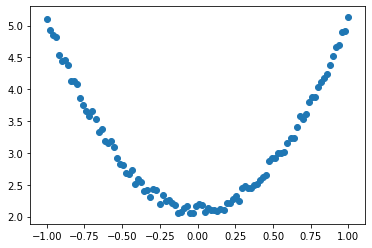

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

np.random.seed(100) 
x0 = np.linspace(-1, 1, 100).reshape(100,1) 
y0 = 3*np.power(x0, 2) +2+ 0.2*np.random.rand(x0.size).reshape(100,1)   
# 画图
plt.scatter(x0, y0)
plt.show()


图2-8 回归使用的数据图形

2. 把numpy转换为TensorFlow 2.0格式的张量或变量

In [2]:
x=tf.constant(x0)
y=tf.constant(y0)

# 随机初始化参数
w0= np.random.rand(1,1)
b0 = np.random.rand(1,1)

3.定义回归模型

In [3]:
class LinearRegression:
    #定义构建函数，初始化权重参数
    def __init__(self,**args):
        super().__init__(*args)
        self.w=tf.Variable(w0)
        self.b=tf.Variable(b0)             
    #定义__call__函数，该模型为单层神经网络，其正向传播操作
    def __call__(self,x):
        y1= tf.square(x)*self.w + self.b
        return y1
    
mymodel=LinearRegression()

4.自定义损失函数

In [4]:
def myloss(x,y):
    mse=tf.reduce_mean(tf.square(y - mymodel(x)))
    return mse

5.使用自动微分及自定义梯度更新方法

In [5]:
lr=0.001

@tf.function
def train_step(x,y,model,epoch):
    for i in range(epoch):
        with tf.GradientTape() as tape:
            loss=myloss(x,y)
        # 反向传播求梯度
        w=model.w
        b=model.b
        dw,db=tape.gradient(loss,[w,b])
        # 梯度下降法更新参数
        w.assign(w - lr*dw)
        b.assign(b - lr*db)
        if i%50==0:
            tf.print(w)
            tf.print(loss)
            tf.print()
    return w,b


对模型进行训练。

In [6]:
w1,b1=train_step(x,y,mymodel,1000)

[[0.7801067362297911]]
4.7428952912163886

[[0.86658873990225349]]
3.826106198444287

[[0.94507231663588342]]
3.0937170971599524

[[1.0164001499027295]]
2.5085182857215607

[[1.081325170615685]]
2.0408104966583185

[[1.14052012453223]]
1.6668889529802871

[[1.1945861197304926]]
1.3678334106850856

[[1.244060262886975]]
1.1285424255595446

[[1.2894224814942188]]
0.93696254872938578

[[1.3311016188012315]]
0.78347310548884364

[[1.3694808790080359]]
0.66039515364338086

[[1.4049026919804632]]
0.561599556304177

[[1.4376730593671871]]
0.4821941633400636

[[1.4680654374040847]]
0.41827413376992056

[[1.4963242057973256]]
0.36672265438855339

[[1.5226677668112352]]
0.3250518823793842

[[1.5472913139829079]]
0.29127599288838213

[[1.5703693056829719]]
0.26380985132148282

[[1.5920576749873472]]
0.24138813813386953

[[1.6124958039705193]]
0.22300079787056615



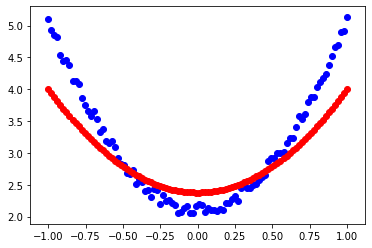

In [7]:
plt.scatter(x, y, c="b")
y1=tf.square(x)*w1 + b1
plt.scatter(x, y1, c="r")
plt.show()


图2-9 使用TensorFlow实现回归问题的拟合结果

6．使用自动微分及优化器  
	虽然上述梯度计算采用自动微分的方法，但梯度更新采用自定义方式，如果损失函数比较复杂，自定义梯度难度会徒增，是否有更好的方法呢？使用优化器可以轻松实现自动微分、自动梯度更新，而这正是方向传播的核心内容。  
	使用优化器（optimizer）的常见方法有3种，介绍如下。  
1）使用apply_gradients方法：先计算损失函数关于模型变量的导数，然后将求出的导数值传入优化器，使用优化器的 apply_gradients 方法迭代更新模型参数以最小化损失函数。  
2）用minimize方法：minimize(loss, var_list) 计算loss所涉及的变量(tf.Varialble)组成的列表或者元组，即tf.trainable_variables()，它是compute_gradients()和apply_gradients()这两个方法的简单组合。用代码可表示如下：


3）在编译时将优化器传入Keras的Model,通过调用model.fit实现对loss的的迭代优化。具体实例可参考本书3.3节。  
下面，我们先来了解如何使用优化器的apply_gradients方法。


In [8]:
lr=0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
@tf.function
def train_step01(x,y,model,epoch):
    for i in range(epoch):
        with tf.GradientTape() as tape:
            loss=myloss(x,y)
        # 说明权重参数
        w=model.w
        b=model.b
        #自动计算损失函数，并返回自变量（模型参数）的梯度
        dw,db=tape.gradient(loss,[w,b])
        #根据梯度自动更新参数，这就实现了梯度反向传播
        optimizer.apply_gradients(grads_and_vars=zip([dw,db],[w,b]))
        # 以下更新梯度步骤就不需要了！
        #w.assign(w - lr*dw)
        #b.assign(b - lr*db)
        if i%50==0:
            tf.print(w)
            tf.print(loss)
            tf.print()
    return w,b


训练模型

In [9]:
w2,b2=train_step01(x,y,mymodel,1000)

[[1.6351919196101972]]
0.20784151748409802

[[1.7851382099935258]]
0.1396838960903809

[[1.8940728845507693]]
0.11520392546786277

[[1.9850682897832033]]
0.097853685743192365

[[2.06589121521148]]
0.083484344505084629

[[2.1393779481700839]]
0.071329459638629064

[[2.2067585378037315]]
0.061021055855304956

[[2.2687233397167494]]
0.052275883399084538

[[2.3257665088450703]]
0.044856602420804866

[[2.378297826286762]]
0.038562160203786028

[[2.4266802052051126]]
0.033222016745471879

[[2.471243266302324]]
0.028691490754136854

[[2.5122891275638288]]
0.024847836349627058

[[2.5500955872658522]]
0.021586917148631608

[[2.584918367451972]]
0.018820384854728894

[[2.6169929599658932]]
0.016473285628541705

[[2.6465362562321673]]
0.014482029358112486

[[2.6737480258226771]]
0.012792666807827185

[[2.6988122711021822]]
0.011359427968262316

[[2.7218984726504551]]
0.010143482006342838



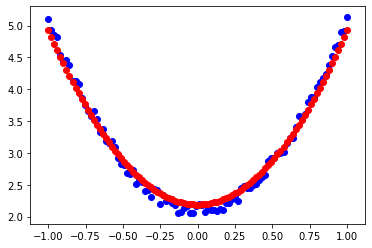

In [10]:
plt.scatter(x, y, c="b")
y2=tf.square(x)*w2 + b2
plt.scatter(x, y2, c="r")
plt.show()

图2-10 使用自动微分的拟合结果  
	由此可见，使用优化器不但可以使程序更简洁，也可以使模型更高效！  
接下来，我们使用优化器的minimize(loss, var_list) 方法更新参数。


In [11]:
lr=0.001

#自定义损失函数
w=tf.Variable(w0,name = "w")
b=tf.Variable(b0,name = "b")
def myloss02():    
    y1= tf.square(x)*w + b
    mse=tf.reduce_mean(tf.square(y - y1))
    return mse

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
@tf.function
def train_step02(epoch):
    for i in range(epoch):
        optimizer.minimize(myloss02,var_list=[w,b])
        if i%100==0:
            tf.print(w)
            tf.print(b)
            tf.print()
    return w,b

训练模型

In [12]:
w3,b3=train_step02(1000)

[[0.79646442284302665]]
[[0.82100652241788585]]

[[1.6369864875158668]]
[[2.3849873081437822]]

[[1.894373360085025]]
[[2.4818837398146458]]

[[2.0660208590544449]]
[[2.4379979132017744]]

[[2.206855683495212]]
[[2.3878391483445465]]

[[2.3258476097053387]]
[[2.3439597666769956]]

[[2.42674887541688]]
[[2.3065970724056921]]

[[2.5123473728700185]]
[[2.2748849971694733]]

[[2.5849677807875904]]
[[2.2479793516784925]]

[[2.6465781778825095]]
[[2.2251527160454709]]



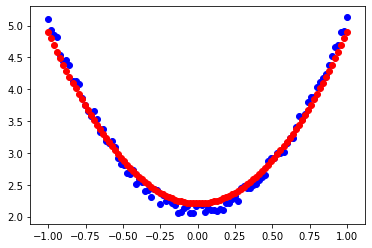

In [13]:
plt.scatter(x, y, c="b")
y3=tf.square(x)*w3 + b3
plt.scatter(x, y3, c="r")
plt.show()

图2-11 使用优化器的拟合结果  
综上，使用优化器的minimize方法更简洁。
